In [191]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from skimage import data
from matplotlib import rcParams

In [80]:
df = pd.read_csv("anime.csv", index_col=0)
df.head()

,name,genre,type,episodes,rating,members
anime_id,,,,,,
32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [81]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12294 entries, 32281 to 26081
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      12294 non-null  object 
 1   genre     12232 non-null  object 
 2   type      12269 non-null  object 
 3   episodes  12294 non-null  object 
 4   rating    12064 non-null  float64
 5   members   12294 non-null  int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 672.3+ KB


In [82]:
df.describe( include = "all" ) 

,name,genre,type,episodes,rating,members
count,12294,12232,12269,12294,12064.000000,1.229400e+04
unique,12292,3264,6,187,NaN,NaN
top,Shi Wan Ge Leng Xiaohua,Hentai,TV,1,NaN,NaN
freq,2,823,3787,5677,NaN,NaN
mean,NaN,NaN,NaN,NaN,6.473902,1.807134e+04
std,NaN,NaN,NaN,NaN,1.026746,5.482068e+04
min,NaN,NaN,NaN,NaN,1.670000,5.000000e+00
25%,NaN,NaN,NaN,NaN,5.880000,2.250000e+02
50%,NaN,NaN,NaN,NaN,6.570000,1.550000e+03
75%,NaN,NaN,NaN,NaN,7.180000,9.437000e+03


In [90]:
df = df[df["rating"]>=6 & (df["members"]>1000)]

df


,name,genre,type,episodes,rating,members
anime_id,,,,,,
32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...
2434,Kijoku: Princess Double Kari,Hentai,OVA,3,6.00,1368
24327,Oyome-sama Honey Days♥,Hentai,OVA,2,6.00,1403
2540,Tonari no Oneesan,"Comedy, Hentai",OVA,2,6.00,1756


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6174 entries, 32281 to 4541
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      6174 non-null   object 
 1   genre     6172 non-null   object 
 2   type      6174 non-null   object 
 3   episodes  6174 non-null   object 
 4   rating    6174 non-null   float64
 5   members   6174 non-null   int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 337.6+ KB


In [92]:
df[df['genre'].isna()]

,name,genre,type,episodes,rating,members
anime_id,,,,,,
33242,IS: Infinite Stratos 2 - Infinite Wedding,NaN,Special,1,7.15,6604
33589,ViVid Strike!,NaN,TV,12,6.96,12345


In [93]:
df = df.dropna(how='any')
final_data = df.drop_duplicates()
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6172 entries, 32281 to 4541
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      6172 non-null   object 
 1   genre     6172 non-null   object 
 2   type      6172 non-null   object 
 3   episodes  6172 non-null   object 
 4   rating    6172 non-null   float64
 5   members   6172 non-null   int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 337.5+ KB


In [94]:
final_data.head()

,name,genre,type,episodes,rating,members
anime_id,,,,,,
32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


Apskaičiuojame kiekį kiekvienos anime rūšies.

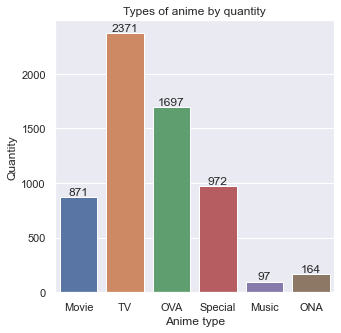

In [380]:
ax = sns.countplot(data=final_data, x ='type')
ax.bar_label(ax.containers[0])
ax.set_title('Types of anime by quantity')
ax.set(xlabel='Anime type', ylabel='Quantity')
plt.show()

Pagal diagramą matome, kad daugiausiai kartų žiūrima TV ir Movie anime.

Apskaičiuojame reitingų vidurkį ir vidutinį narių skaičių pagal anime tipus.

In [231]:
final_data.groupby('type')[['rating','members']].mean().round(2)


,rating,members
type,,
Movie,7.35,26921.32
Music,6.82,5397.31
ONA,6.81,14913.10
OVA,6.87,10813.47
Special,7.01,12800.73
TV,7.28,66972.03


Diagramoje pateikti anime tipai pagal reitingus ir narių skaičių.

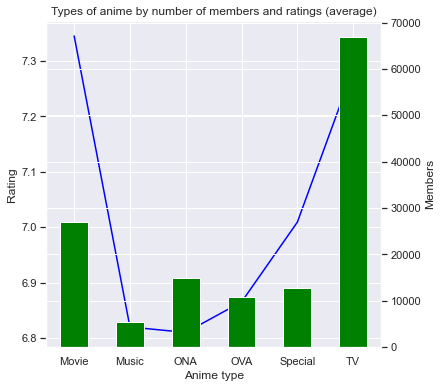

In [379]:
fig, ax = plt.subplots(figsize=(6,6))
p1 = final_data.groupby('type').mean()['rating'].plot(ax=ax, color = 'blue')
ax2=ax.twinx()
p2 = final_data.groupby('type').mean()['members'].plot( kind = "bar", color = 'green')
ax.set_ylabel('Rating') 
ax2.set_ylabel('Members') 
ax.set_xlabel('Anime type')
ax.set_title('Types of anime by number of members and ratings (average)')

plt.show()

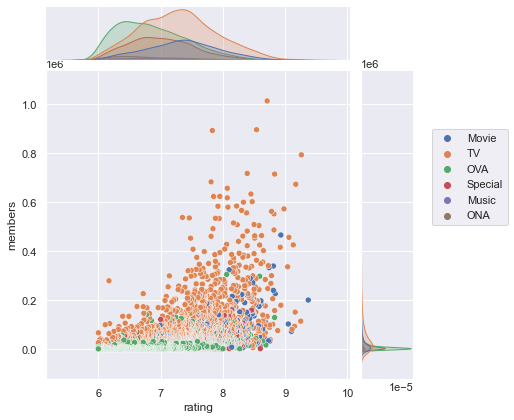

In [381]:
ax = sns.jointplot(data=final_data, x="rating", y="members",hue = "type" )
ax.ax_joint.legend_._visible=False
ax.fig.legend(bbox_to_anchor=(1, 0.7), loc=2)

In [ ]:
Išfiltruojame dešimt didžiausią reitingą turinčių anime neatsižvelgiant į anime tipą.

In [13]:
top_10_rating = final_data.nlargest(n=10, columns=['rating'], keep = "all")
top_10_rating

,name,genre,type,episodes,rating,members
anime_id,,,,,,
32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
32935,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...,"Comedy, Drama, School, Shounen, Sports",TV,10,9.15,93351
11061,Hunter x Hunter (2011),"Action, Adventure, Shounen, Super Power",TV,148,9.13,425855
820,Ginga Eiyuu Densetsu,"Drama, Military, Sci-Fi, Space",OVA,110,9.11,80679
15417,Gintama&#039;: Enchousen,"Action, Comedy, Historical, Parody, Samurai, S...",TV,13,9.11,81109


Išfiltruojame dešimt didžiausią narių kiekį turinčių anime neatsižvelgiant į anime tipą.

In [14]:
top_10_members = final_data.nlargest(n=10, columns=['members'], keep = "all")
top_10_members

,name,genre,type,episodes,rating,members
anime_id,,,,,,
1535,Death Note,"Mystery, Police, Psychological, Supernatural, ...",TV,37,8.71,1013917
16498,Shingeki no Kyojin,"Action, Drama, Fantasy, Shounen, Super Power",TV,25,8.54,896229
11757,Sword Art Online,"Action, Adventure, Fantasy, Game, Romance",TV,25,7.83,893100
5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
6547,Angel Beats!,"Action, Comedy, Drama, School, Supernatural",TV,13,8.39,717796
1575,Code Geass: Hangyaku no Lelouch,"Action, Mecha, Military, School, Sci-Fi, Super...",TV,25,8.83,715151
20,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
10620,Mirai Nikki (TV),"Action, Mystery, Psychological, Shounen, Super...",TV,26,8.07,657190


Patikriname, ar yra sutampančių anime pagal didžiausią reitingą ir narių skaičių.

In [15]:
top_10_combined = top_10_rating.assign(result=top_10_rating['name'].isin(top_10_members['name']))
top_10_combined[top_10_combined['result'] == True]

,name,genre,type,episodes,rating,members,result
anime_id,,,,,,,
5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,True
9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,True


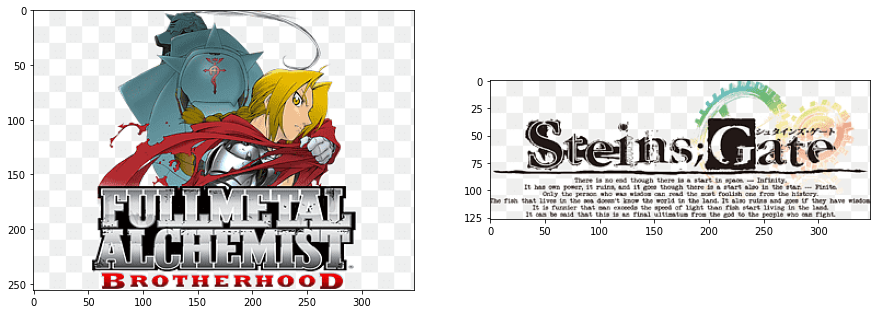

In [217]:
from matplotlib import rcParams

myImage_1 = Image.open("Brotherhood.png")
myImage_2 = Image.open("png.png")

rcParams['figure.figsize'] = 15 ,10

fig, ax = plt.subplots(1,2)
ax[0].imshow(myImage_1)
ax[1].imshow(myImage_2)

Analizė pagal žanrus

In [244]:
genre_count = final_data ['genre'].value_counts().nlargest(n=15, keep = "all")
genre_count=pd.DataFrame(genre_count)
genre_count = genre_count.reset_index()
genre_count

,index,genre
0,Hentai,507
1,Comedy,136
2,Music,69
3,"Comedy, Slice of Life",58
4,"Comedy, School, Slice of Life",55
5,"Adventure, Comedy, Mystery, Police, Shounen",32
6,"Action, Mecha, Sci-Fi",31
7,"Action, Adventure, Comedy, Shounen",30
8,"Comedy, Parody",29
9,"Adventure, Mecha, Sci-Fi, Shounen",26


Analizė pagal gautas kategorijas neįmanoma, kadangi kartojasi tos pačios žanrų rūšys. Todėl yra susikuriamos naujos žanrų kategorijos.

Naujos žanrų kategorijos

In [333]:
def genre_identification (str):
    result_text = ''
    if "Comedy" in str:
        result_text += "Comedy "
    if "Fantasy" in str:
        result_text += "Fantasy "
    if "Adventure" in str:
        result_text += "Adventure "
    return (result_text)
        

final_data["filtered_genre"]= final_data["genre"].map(genre_identification)
final_data


,name,genre,type,episodes,rating,members,filtered_genre
anime_id,,,,,,,
32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,
5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,Fantasy Adventure
28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,Comedy
9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,
9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266,Comedy
...,...,...,...,...,...,...,...
2434,Kijoku: Princess Double Kari,Hentai,OVA,3,6.00,1368,
24327,Oyome-sama Honey Days♥,Hentai,OVA,2,6.00,1403,
2540,Tonari no Oneesan,"Comedy, Hentai",OVA,2,6.00,1756,Comedy


In [334]:
final_data["filtered_genre"].astype(str)
final_data["filtered_genre"] = final_data["filtered_genre"].replace('',"Not suitable")
final_data.head()  


,name,genre,type,episodes,rating,members,filtered_genre
anime_id,,,,,,,
32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,Not suitable
5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,Fantasy Adventure
28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,Comedy
9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,Not suitable
9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266,Comedy


In [341]:
final_data['filtered_genre'].value_counts()

Not suitable                 2357
Comedy                       1794
Adventure                     430
Fantasy                       422
Comedy Fantasy Adventure      308
Comedy Adventure              307
Fantasy Adventure             297
Comedy Fantasy                257
Name: filtered_genre, dtype: int64

In [420]:
fd_genre = final_data[final_data ['filtered_genre'] != "Not suitable"]
fd_genre.reset_index()


,anime_id,name,genre,type,episodes,rating,members,filtered_genre
0,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,Fantasy Adventure
1,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,Comedy
2,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266,Comedy
3,32935,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...,"Comedy, Drama, School, Shounen, Sports",TV,10,9.15,93351,Comedy
4,11061,Hunter x Hunter (2011),"Action, Adventure, Shounen, Super Power",TV,148,9.13,425855,Adventure
...,...,...,...,...,...,...,...,...
3810,5411,Suika: Manatsu no Okurimono,"Drama, Fantasy, Hentai, Romance",OVA,1,6.04,1008,Fantasy
3811,1353,The Urotsuki,"Adventure, Demons, Fantasy, Hentai, Horror",OVA,3,6.01,1480,Fantasy Adventure
3812,2145,Black Gate: Kanin no Gakuen,"Fantasy, Hentai, Supernatural",OVA,2,6.00,2982,Fantasy
3813,1496,Fushigi no Kuni no Miyuki-chan,"Comedy, Ecchi, Fantasy, Shoujo Ai, Yuri",OVA,2,6.00,7240,Comedy Fantasy


Apskaičiuojame kiekvienos kategorijos kiekius.

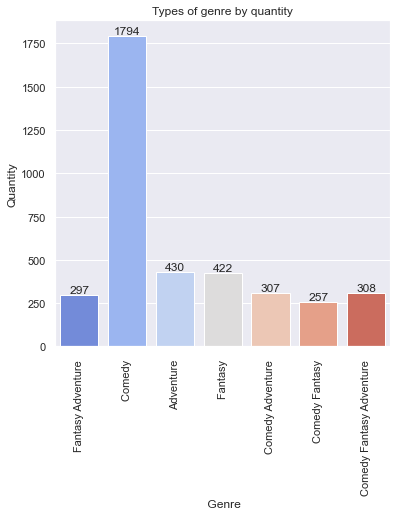

In [421]:
ax = sns.countplot(data=fd_genre, x ='filtered_genre', palette="coolwarm")
ax.bar_label(ax.containers[0])
ax.set_title('Types of genre by quantity')
ax.set(xlabel=' Genre', ylabel='Quantity')
plt.xticks(rotation=90)

sns.set(rc={'figure.figsize':(6,6)})
plt.show()

Rating ir members

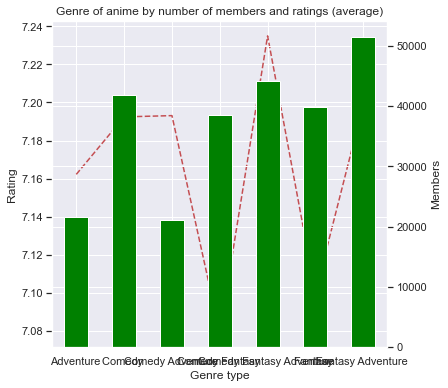

In [422]:
fig, ax = plt.subplots()
p1 = fd_genre.groupby('filtered_genre').mean()['rating'].plot(ax=ax, c="r", ls = '--')
ax2=ax.twinx()
p2 = fd_genre.groupby('filtered_genre').mean()['members'].plot( kind = "bar", color = 'green')
ax.set_ylabel('Rating') 
ax2.set_ylabel('Members') 
ax.set_xlabel('Genre type')
ax.set_title('Genre of anime by number of members and ratings (average)')
plt.xticks(rotation = 90)
plt.show()


Nustatome priklausomybę tarp reitingų dydžio ir narių balsavimo kiekio.

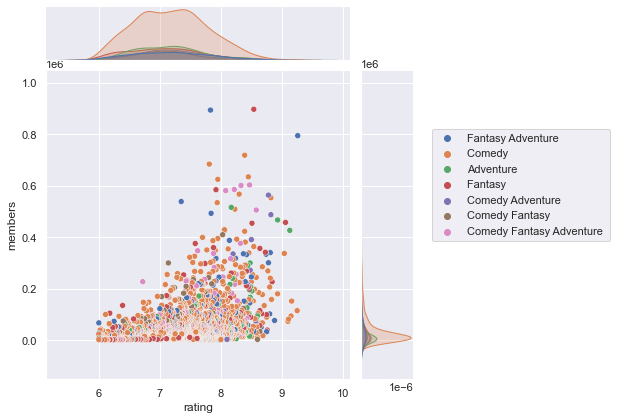

In [423]:
ax = sns.jointplot(data=fd_genre, x="rating", y="members",hue = "filtered_genre" )
ax.ax_joint.legend_._visible=False
ax.fig.legend(bbox_to_anchor=(1, 0.7), loc=2)


!!!!!Pagal duomenis galima nustatyti, kad didėjnat reitingams, didėja ir reitingavusių narių skaičius. 
Dažniausiai suteikiamas reitingas buvo tarp 6,8 ir 7,5, o aktyviausios grupes yra kai balsuotojų skaicius iki 20 000.

Didžiausio žanro Comedy analizė .nlargest(n=11, columns=['members'], keep = "all")

In [464]:
fd_genre[fd_genre["filtered_genre"] == "Comedy "][['members','rating']]


,members,rating
1,114262,9.25
2,151266,9.16
3,93351,9.15
5,72534,9.10
6,81109,9.11
...,...,...
3803,2108,6.19
3805,1135,6.14
3808,1027,6.12
3809,1173,6.10


In [468]:
fd_genre.iloc[1:3]


,anime_id,name,genre,type,episodes,rating,members,filtered_genre
1,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,Comedy
2,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266,Comedy


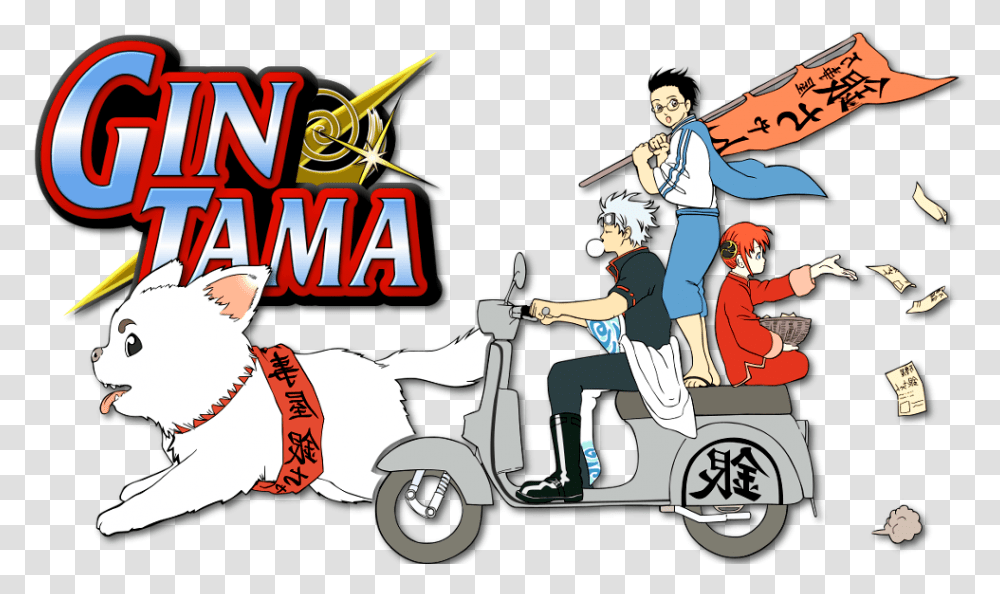

In [453]:
myImage_3 = Image.open("gintama.png")
myImage_3

<AxesSubplot:xlabel='type', ylabel='members'>

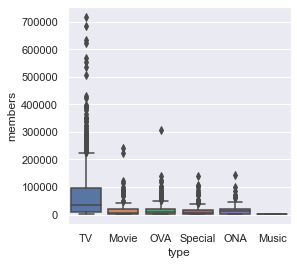

In [469]:
comedy_data = fd_genre[fd_genre["filtered_genre"] == "Comedy "]

sns.boxplot(data = comedy_data, x = "type", y = "members")

Anime tipų - Movie ir TV analizė

In [241]:
TV_data = final_data[final_data['type'] == "TV"]
TV_data.head()

,name,genre,type,episodes,rating,members
anime_id,,,,,,
5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
32935,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...,"Comedy, Drama, School, Shounen, Sports",TV,10,9.15,93351
